# Decision Trees and Regression Trees

Decision Trees are a non-parametric supervised learning method used for both classification and regression tasks. Their purpose is to create a predictive model that learns decision-making rules from input features to estimate the value of a target variable. In essence, a decision tree approximates the target variable using piecewise constant functions.

**Why Use Decision Trees?**
Decision Trees are popular for predictive modeling because they are easy to understand, interpret, and implement while being highly effective for many tasks. They work by splitting the dataset into smaller and smaller subsets based on specific features, ultimately leading to a prediction.

The prediction process happens in two stages:

1. Training Stage: The model learns by constructing the decision tree using labeled data. This involves selecting the best feature splits, testing, and optimizing the tree.
2. Prediction Stage: The trained model predicts the outcome for new, unseen data based on learned decision rules.

---
**Key Components of a Decision Tree**
A decision tree is composed of two primary elements: nodes and branches.

**Root Node:**
The starting point of the tree where the first feature is evaluated.
This node represents the entire dataset before any splits occur.

**Decision Nodes:**
Intermediate nodes where feature conditions are evaluated.
These nodes have incoming branches (from parent nodes) and outgoing branches (to child nodes).

**Leaf Nodes:**
Final nodes where predictions are made.
Each leaf represents a specific outcome or value based on the decision path.

The code below visualizes the Iris dataset, focusing on the first two features: Petal Length and Petal Width. These features help demonstrate how a decision tree might classify flowers based on their measurements.

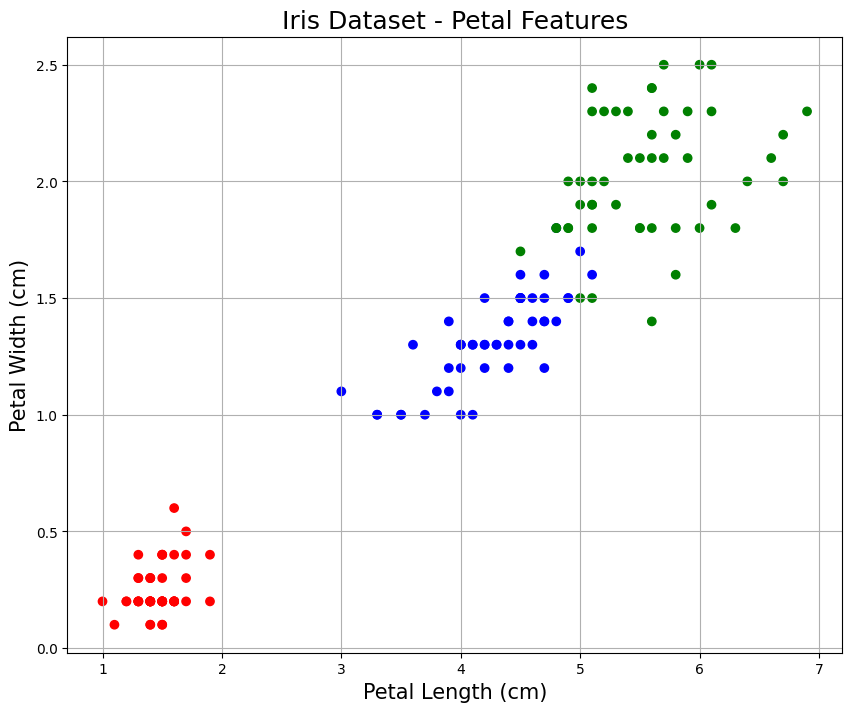

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn import metrics
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_decision_regions

iris = load_iris()
X = iris.data[:, 2:4]  # Only the last two features for 2D plotting
y = iris.target

# Assign colors based on class labels
colors = ["red" if label == 0 else "blue" if label == 1 else "green" for label in y]

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.xlabel("Petal Length (cm)", fontsize=15)
plt.ylabel("Petal Width (cm)", fontsize=15)
plt.title("Iris Dataset - Petal Features", fontsize=18)
plt.grid(True)
plt.show()

We split the Iris dataset into training and testing sets, assigns colors to the data points based on their class labels, and visualize the training set using a scatter plot.

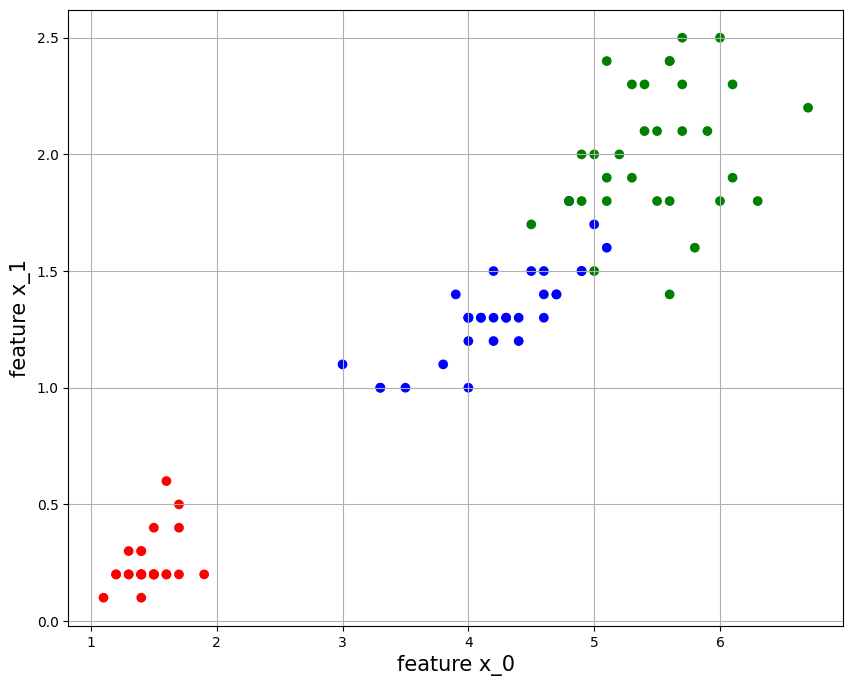

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 42)

# Assign colors based on class labels (entire dataset)
colors = ["red" if label == 0 else "blue" if label == 1 else "green" for label in y]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Consistent color assignment for training and test sets
c_train = ["red" if label == 0 else "blue" if label == 1 else "green" for label in y_train]
c_test = ["red" if label == 0 else "blue" if label == 1 else "green" for label in y_test]

plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c = c_train)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

Then instantiating an instance of the sklearn.tree.DecisionTreeClassifier model. We train the model by calling the fit() method. This can be shown by running the following code cell.

In [ ]:
decision_tree = DecisionTreeClassifier(max_depth=15, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

Now that the model has been trained we can visualize the tree structure of our current model by calling the sklearn.tree.plot_tree() function.

|--- x_0 <= 2.45
|   |--- class: 0
|--- x_0 >  2.45
|   |--- x_1 <= 1.75
|   |   |--- x_0 <= 5.35
|   |   |   |--- x_1 <= 1.65
|   |   |   |   |--- x_0 <= 4.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- x_0 >  4.95
|   |   |   |   |   |--- x_0 <= 5.05
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- x_0 >  5.05
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- x_1 >  1.65
|   |   |   |   |--- x_0 <= 4.75
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- x_0 >  4.75
|   |   |   |   |   |--- class: 1
|   |   |--- x_0 >  5.35
|   |   |   |--- class: 2
|   |--- x_1 >  1.75
|   |   |--- x_0 <= 4.85
|   |   |   |--- class: 2
|   |   |--- x_0 >  4.85
|   |   |   |--- class: 2
 



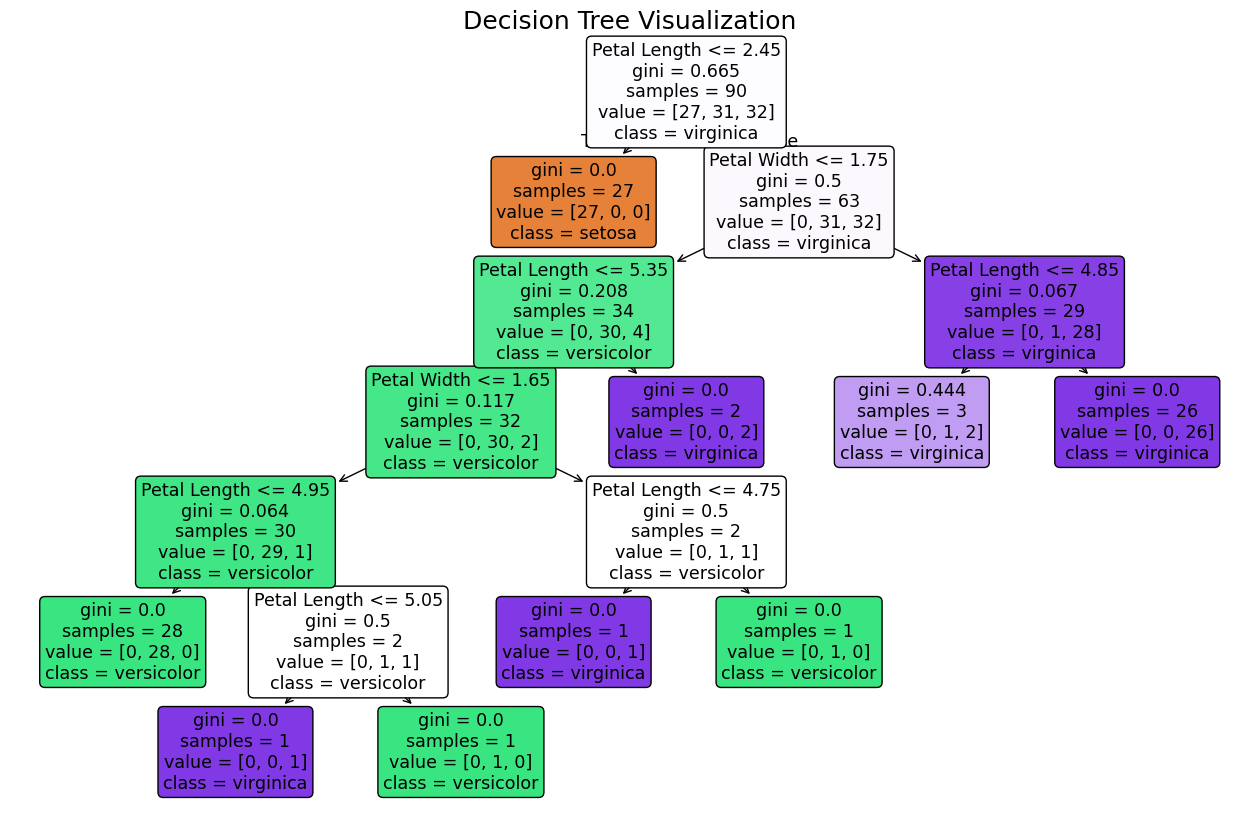

In [ ]:
tree_rules = export_text(decision_tree,
                         feature_names = ["x_0", "x_1"])
print(tree_rules, "\n")

plt.figure(figsize=(16, 10))
plot_tree(decision_tree,
          feature_names=["Petal Length", "Petal Width"],
          class_names=iris.target_names,
          filled=True, rounded=True)
plt.title("Decision Tree Visualization", fontsize=18)
plt.show()

This is a decision tree visualization, which represents the decision-making process of a trained decision tree model. Each node and branch in the tree corresponds to a decision based on feature values, and each leaf node represents a predicted class or outcome.

Starting from the root node, follow the branches based on the conditions to classify a sample.

1. If Petal Length <= 2.45 is true, move to the left.
2. If the next condition (Petal Width <= 1.75) is true, continue moving to the left.
3. Continue this process until you reach a leaf node, which gives the predicted class.

All samples that belong to **Setosa** have a Petal Length <= 2.45 showing that Setosa has distinctly smaller petal lengths compared to other species.
Then if the Petal Width <= 1.75, there is a clear split that primarily separates **Versicolor** (green nodes) from **Virginica** (purple nodes). However, Versicolor and Virginica require multiple splits based on both Petal Length and Petal Width to achieve accurate classification.

The tree captures how feature values like Petal Length and Petal Width split the data into different classes of the Iris dataset (Setosa, Versicolor, Virginica).



We can visualize the decision regions generated by our trained decision tree in the next code block.

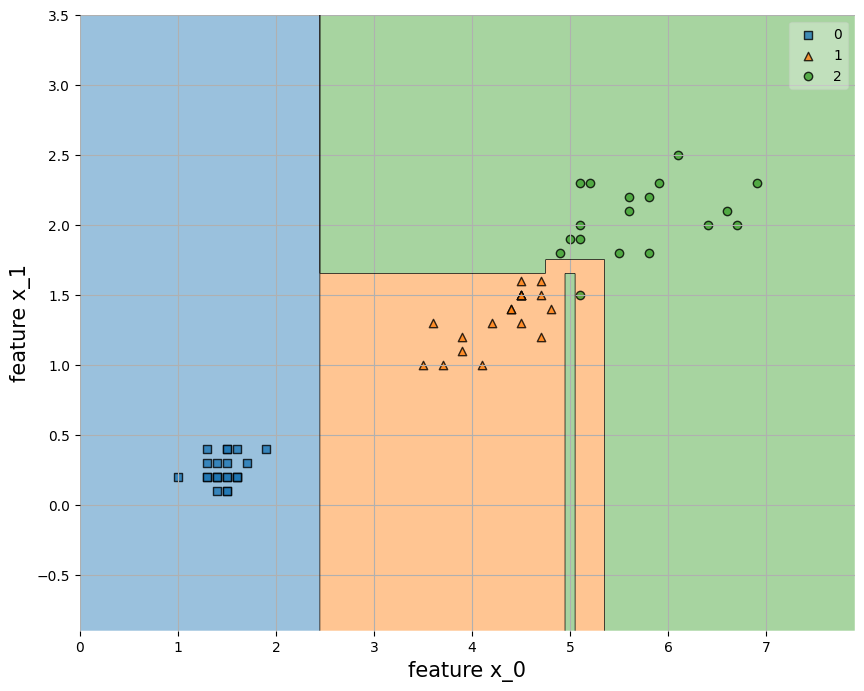

In [ ]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X_test, y_test, clf = decision_tree)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

We next evaluate our models performance on the testing data.

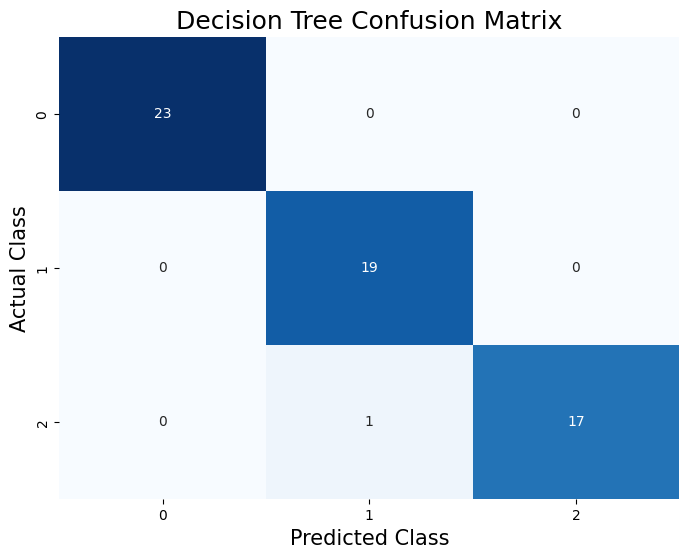

In [ ]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(matrix_df, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Decision Tree Confusion Matrix", fontsize=18)
plt.xlabel("Predicted Class", fontsize=15)
plt.ylabel("Actual Class", fontsize=15)
plt.show()

In [ ]:
y_pred = decision_tree.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



The model performs very well across all the classes.

# Regression Trees

Regression Trees are closely related to decision trees but used for regression tasks, where the target variable is continuous. The data is split each node based on a feature that minimizes the variance or mean squared error (MSE) within the resulting groups.The final prediction is a numerical value.

We will be using the diabetes dataset and attempt to perform regression on one of the columns of data using a regression tree. In the Diabetes dataset, the target variable represents a measure of diabetes progression one year after baseline measurements were taken.

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

diabetes = load_diabetes()

X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name="target")

In [ ]:
reg = DecisionTreeRegressor(max_depth=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12)

reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

To show how tree depth can affect model accuracy, we will fit two models with one very shallow and one very deep.

In [ ]:
reg1 = DecisionTreeRegressor(max_depth=1, random_state = 12)
reg1.fit(X_train, y_train)
y_pred = reg1.predict(X_test)
print(f"MSE reg1: {mean_squared_error(y_test, y_pred)} \n")

reg2 = DecisionTreeRegressor(max_depth=20, random_state = 12)
reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)
print(f"MSE reg2: {mean_squared_error(y_test, y_pred)} \n")

MSE reg1: 4488.292921976607 

MSE reg2: 6971.108108108108 



In [ ]:
reg1 = DecisionTreeRegressor(max_depth=1)
reg1.fit(X_train, y_train)
y_pred = reg1.predict(X_test)
print(f"MSE reg1: {mean_squared_error(y_test, y_pred)} \n")

reg2 = DecisionTreeRegressor(max_depth=20)
reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)
print(f"MSE reg2: {mean_squared_error(y_test, y_pred)} \n")

MSE reg1: 4488.292921976607 

MSE reg2: 6430.972972972973 



When the tree is too shallow (max depth = 1), it cannot capture enough complexity of the data. The MSE is higher because the model is too simple and fails to generalize well.

If the tree is very deep (max depth = 20), it will fit the training data extremely well. On the test set, the MSE may increase because the model captures noise in the training data and fails to generalize.

A balanced model will have the best outcome. An intermediate depth balances simplicity and complexity, capturing important trends without overfitting.
The MSE is expected to be lower than both reg1 and reg2.

We visualize the two decision trees.

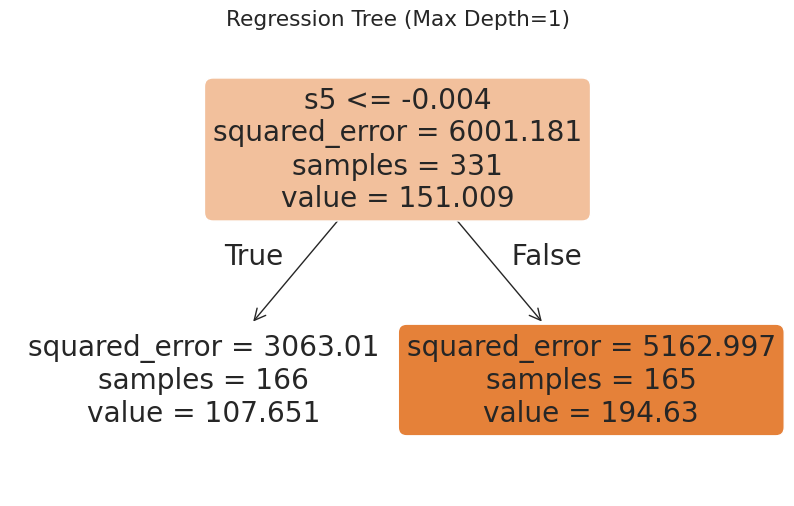

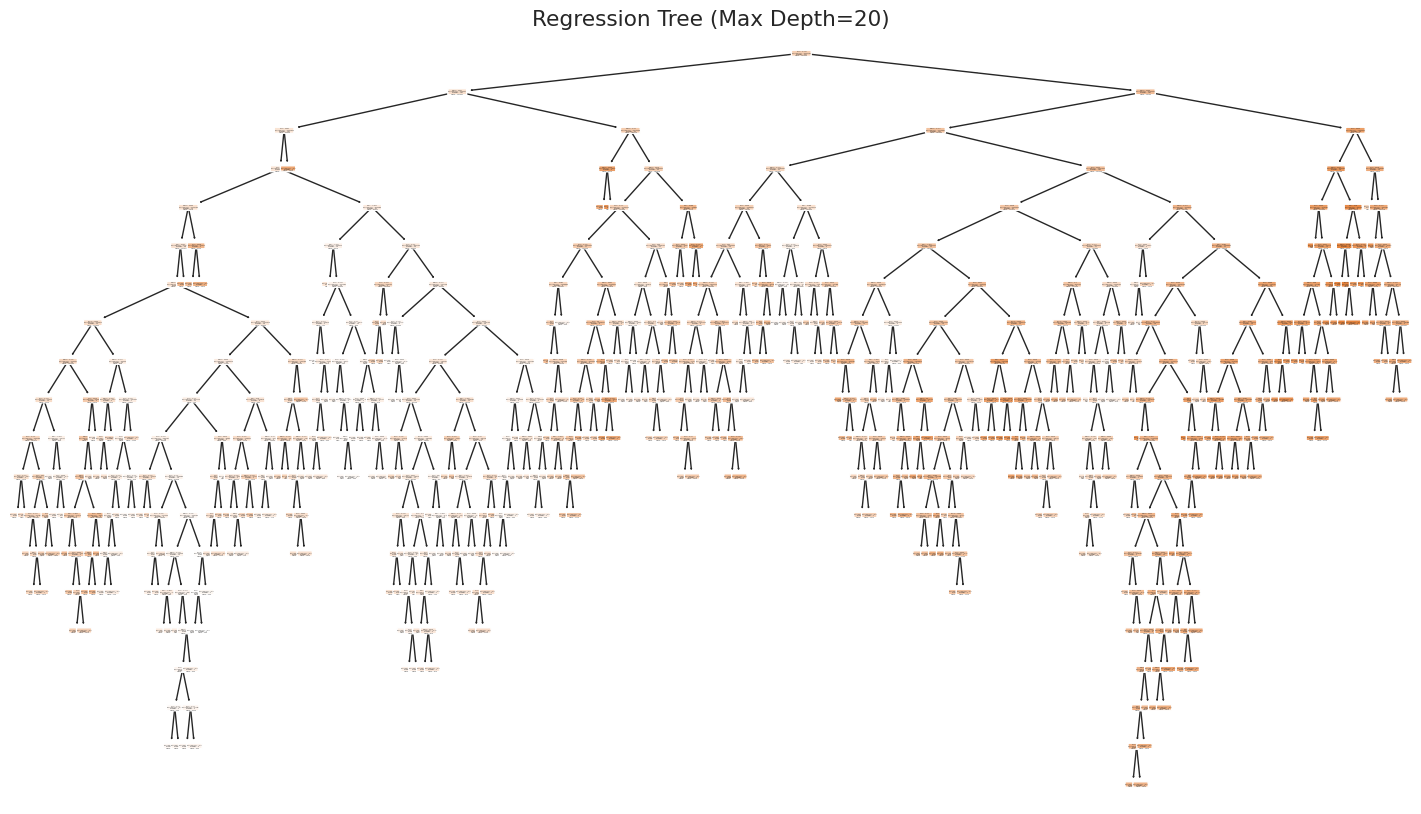

In [ ]:
# Plot reg1 (depth=1)
plt.figure(figsize=(10, 6))
plot_tree(reg1, feature_names=X.columns, filled=True, rounded=True)
plt.title("Regression Tree (Max Depth=1)")
plt.show()

# Plot reg2 (depth=20)
plt.figure(figsize=(18, 10))
plot_tree(reg2, feature_names=X.columns, filled=True, rounded=True)
plt.title("Regression Tree (Max Depth=20)")
plt.show()


**Regression Tree with Max Depth = 1**
This tree is extremely shallow, containing only one decision split.

This tree underfits the data, capturing only a very basic trend and failing to model finer relationships in the dataset. However, it is easy to interpret and provides a simple understanding of the most important feature (s5).

**Regression Tree with Max Depth = 20**
This tree is very deep, containing numerous splits and branches.

While this tree likely has low error on the training set, it may have poor generalization to the test set due to overfitting. The complexity also makes it difficult to interpret or explain to stakeholders.

To see how important features are in predictions,

Feature Importances:
  Feature  Importance
8      s5    0.368365
2     bmi    0.259461
0     age    0.081478
3      bp    0.077751
5      s2    0.051317
4      s1    0.049844
6      s3    0.036029
9      s6    0.034724
7      s4    0.022590
1     sex    0.018441


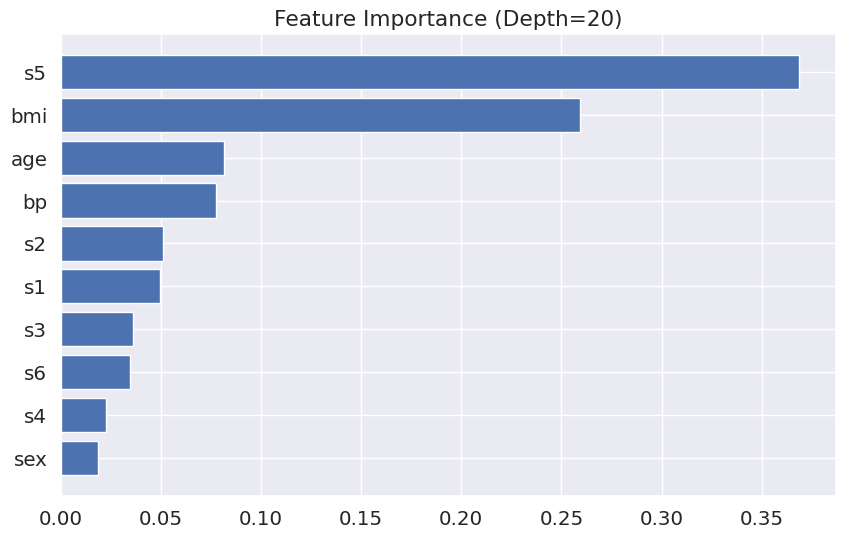

In [ ]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": reg2.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display top features
print("Feature Importances:")
print(feature_importance)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance["Feature"], feature_importance["Importance"])
plt.title("Feature Importance (Depth=20)")
plt.gca().invert_yaxis()
plt.show()

Feature importance indicates how much each feature contributes to the model's predictions, with higher values reflecting greater influence. We can see that s5 (the log of serum triglycerides level (ltg)) and bmi have the greatest effects on the progression rate of diabetes.

Regression trees are intuitive and effective for capturing complex relationships in data. They are able to strike a balance between simplicity and predictive power but require careful tuning to avoid underfitting or overfitting.
